## **The fourth in-class-exercise (40 points in total, 03/29/2022)**





Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 
https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here

# Run in python console
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=98919d20bd4cb0ccbf8b0a2755bdf4661a3e6a225f48dead99b5b3f61ef11563
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [4]:
from google.colab import files
uploaded = files.upload()
import io
RowTweetdata = pd.read_csv(io.BytesIO(uploaded["CleanDataAva.csv"]))
Tweetdata = RowTweetdata
Tweetdata

Saving CleanDataAva.csv to CleanDataAva.csv


,document_id,RawText,clean_text
0,0,"RT @AfricanArchives: 10 years ago today, at on...",africanarch year ago today unarm trayvon marti...
1,1,"RT @AfricanArchives: 10 years ago today, at on...",africanarch year ago today unarm trayvon marti...
2,2,Learn the concrete steps on how spiritual lead...,learn concret step spiritu leader integr anti ...
3,3,RT @angelicaross: Found the @watchallblk app o...,angelicaross found watchallblk app samsung tv ...
4,4,"RT @AfricanArchives: 10 years ago today, at on...",africanarch year ago today unarm trayvon marti...
...,...,...,...
9995,9995,RT @DeccanHerald: A jury found three former Mi...,deccanherald a juri found three former minneap...
9996,9996,RT @Alima1000: The trustees of GEMS have aucti...,alima the truste gem auction fiduciari duti kk...
9997,9997,"RT @marrs_edward: I know there's a war but,\n#...",marr edward i know war blacklivesmatt plea fre...
9998,9998,RT @OldMainBell: Ding ding* ding Ding &amp; Di...,oldmainbel ding ding ding ding amp ding ding d...


In [6]:
data = Tweetdata

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data['clean_text']))

print(data_words[:])

[['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac'], ['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac'], ['learn', 'concret', 'step', 'spiritu', 'leader', 'integr', 'anti', 'racism', 'ministri', 'spiritu', 'leadership', 'commun', 'click', 'info', 'http', 'co', 'jofotswpu', 'thisisamerica', 'racialjustic', 'racisminamerica', 'blacklivesmatt', 'http', 'co', 'yfbwhrul'], ['angelicaross', 'found', 'watchallblk', 'app', 'samsung', 'tv', 'about', 'watch', 'right', 'beyondedbuck', 'blacklivesmatt'], ['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac'], ['south', 'africa', 'gem', 'audac', 'repeat', 'realiti', 'apartheid', 'discrimin', 'http', 'co', 'rsfvfielij', 'cmscaresu', 'thedpsa', 'healthza', 'tourism', 'gov', 'za', 'qm', 'ir', 'constitut',

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['africanarch', 'year', 'ago', 'today', 'unarm', 'trayvon', 'martin', 'shot', 'dead', 'georg', 'zimmerman', 'fuel', 'movement', 'blac']


In [10]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [11]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['africanarch', 'year', 'ago', 'today', 'shoot', 'dead', 'movement']]


In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [14]:
id2word[5]

'today'

In [15]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('africanarch', 1),
  ('ago', 1),
  ('dead', 1),
  ('movement', 1),
  ('shoot', 1),
  ('today', 1),
  ('year', 1)]]

In [16]:
# Build LDA model
Num_Topics = 3
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics= Num_Topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [17]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.166*"black" + 0.148*"gem" + 0.105*"auction_fiduciari" + 0.068*"kkk" + '
  '0.053*"peopl" + 0.036*"ukrain" + 0.031*"number" + 0.012*"reach" + '
  '0.011*"color" + 0.011*"oppress"'),
 (1,
  '0.078*"co" + 0.056*"blacklivesmatt" + 0.050*"steal" + 0.050*"break" + '
  '0.050*"broad" + 0.050*"daylight" + 0.039*"time" + 0.027*"http" + '
  '0.026*"doctor" + 0.020*"black"'),
 (2,
  '0.036*"year" + 0.028*"today" + 0.018*"compass_injustic" + 0.014*"think" + '
  '0.012*"stophat" + 0.012*"effort" + 0.010*"poet" + 0.009*"spend" + '
  '0.008*"field_toward" + 0.008*"med"')]


In [18]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.687381385577066

Coherence Score:  0.5626693436373967


In [19]:
!pip install datascience
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install tensorflow

     |████████████████████████████████| 69 kB 3.8 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=8eb9af8166d17c8c2eda1602ddf578e4d3506ccd6dec9cbd545df1e5b322751b
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 462 kB 5.2 MB/s 


In [20]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.245665  0.179965       1        1  53.505849
2      0.045222 -0.287290       2        1  26.291032
0     -0.290887  0.107325       3        1  20.203119, topic_info=                   Term         Freq        Total Category  logprob  loglift
34                black  2350.000000  2350.000000  Default  30.0000  30.0000
20                  gem  1596.000000  1596.000000  Default  29.0000  29.0000
1660  auction_fiduciari  1131.000000  1131.000000  Default  28.0000  28.0000
7                    co  2221.000000  2221.000000  Default  27.0000  27.0000
1661                kkk   733.000000   733.000000  Default  26.0000  26.0000
...                 ...          ...          ...      ...      ...      ...
34                black  1787.016486  2350.469134   Topic3  -1.7974   1.3253
161              number   331.165940   442.532260   Topic3  -3.4831   1.3094
3832                dtp    25.305083    28.392231   Topic3  -6.0547   1.4842
3769            comfort    26.996888    42.889678   Topic3  -5.9900   1.1364
988              doctor    34.406807   771.930420   Topic3  -5.7475  -1.5113

[143 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
1         2  0.980877                ago
217       1  0.985577                amp
217       2  0.017758                amp
2392      2  0.987433          architect
1660      2  0.000883  auction_fiduciari
...     ...       ...                ...
64        2  0.011136              world
64        3  0.979935              world
1040      2  0.993246              write
2328      2  0.994519             writer
6         2  0.998327               year

[206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [21]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()



openjdk version "11.0.14.1" 2022-02-08
OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [22]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2022-04-23 20:53:00--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2022-04-23 20:53:00--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  11.7MB/s    in 1.3s    

2022-04-23 20:53:02 (11.7 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.

In [23]:
from google.colab import drive
drive.mount("/content/gdrive")
%cd gdrive

Mounted at /content/gdrive
/content/gdrive


In [24]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = "/content/mallet-2.0.8/bin/mallet"

In [25]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [26]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(7,
  [('black', 0.5806715806715806),
   ('time', 0.16543816543816545),
   ('doctor', 0.09172809172809172),
   ('teenag', 0.033169533169533166),
   ('amerikkka', 0.003276003276003276),
   ('argument', 0.0028665028665028664),
   ('receiv', 0.0028665028665028664),
   ('find', 0.0028665028665028664),
   ('pcdrvwkm', 0.002457002457002457),
   ('tv_shout', 0.002457002457002457)]),
 (4,
  [('blacklivesmatt', 0.2042810609585854),
   ('ukrain', 0.09539320614239181),
   ('day', 0.05956258724988367),
   ('world', 0.048859934853420196),
   ('find', 0.024662633783154957),
   ('bidenharri_reparationsnow', 0.021405304792926943),
   ('talk', 0.020009306654257795),
   ('tigray', 0.01675197766402978),
   ('invad_biafra', 0.013959981386691484),
   ('nigeria_state', 0.013959981386691484)]),
 (2,
  [('year', 0.1528812230497844),
   ('shoot', 0.13876911015288124),
   ('movement', 0.13680909447275577),
   ('ago', 0.13563308506468053),
   ('dead', 0.12779302234417875),
   ('today', 0.12465699725597805),
   

In [27]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [28]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

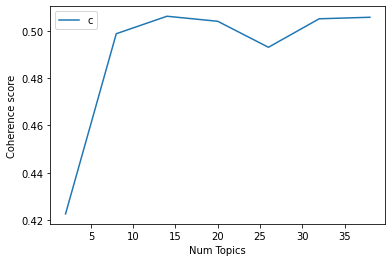

In [29]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [30]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4227
Num Topics = 8  has Coherence Value of 0.4987
Num Topics = 14  has Coherence Value of 0.5061
Num Topics = 20  has Coherence Value of 0.504
Num Topics = 26  has Coherence Value of 0.493
Num Topics = 32  has Coherence Value of 0.5051
Num Topics = 38  has Coherence Value of 0.5057


In [31]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.152*"movement" + 0.147*"today" + 0.143*"africanarch" + 0.142*"dead" + '
  '0.139*"shoot" + 0.133*"ago" + 0.088*"year" + 0.001*"intersect" + '
  '0.001*"doubt" + 0.001*"streetartdream"'),
 (1,
  '0.155*"year" + 0.150*"africanarch" + 0.141*"today" + 0.141*"shoot" + '
  '0.137*"ago" + 0.115*"movement" + 0.112*"dead" + 0.001*"cost" + '
  '0.001*"abolitionist" + 0.001*"thirst"'),
 (2,
  '0.151*"cmscaresu" + 0.146*"black" + 0.136*"time" + 0.091*"doctor" + '
  '0.072*"presidencyza" + 0.058*"gem" + 0.055*"http" + 0.052*"number" + '
  '0.032*"racial" + 0.028*"gcujkzqm"'),
 (3,
  '0.165*"dead" + 0.162*"today" + 0.149*"shoot" + 0.141*"movement" + '
  '0.131*"ago" + 0.112*"africanarch" + 0.089*"year" + 0.001*"belaru" + '
  '0.001*"line" + 0.001*"focu"'),
 (4,
  '0.204*"blacklivesmatt" + 0.057*"murder" + 0.054*"stop" + 0.053*"live" + '
  '0.045*"reach" + 0.037*"spread" + 0.031*"save" + 0.028*"good" + '
  '0.027*"death" + 0.024*"ignor"'),
 (5,
  '0.097*"color" + 0.070*"amp" + 0.047*"justic

In [32]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data['clean_text'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,12.0,0.0809,"movement, ago, africanarch, today, dead, shoot...",africanarch year ago today unarm trayvon marti...
1,1,0.0,0.0789,"movement, today, africanarch, dead, shoot, ago...",africanarch year ago today unarm trayvon marti...
2,2,11.0,0.0942,"blacklivesmatt, make, give, russian, learn, sp...",learn concret step spiritu leader integr anti ...
3,3,17.0,0.0833,"ukrain, day, polic, world, watch, week, talk, ...",angelicaross found watchallblk app samsung tv ...
4,4,12.0,0.0887,"movement, ago, africanarch, today, dead, shoot...",africanarch year ago today unarm trayvon marti...
5,5,13.0,0.0980,"gem, auction_fiduciari, kkk, racist, checkmat,...",south africa gem audac repeat realiti aparthei...
6,6,6.0,0.0852,"place, http, live, time, matter, blm, univer, ...",rgarcia sport trayvon martin murder ten year a...
7,7,1.0,0.0906,"year, africanarch, today, shoot, ago, movement...",africanarch year ago today unarm trayvon marti...
8,8,1.0,0.0848,"year, africanarch, today, shoot, ago, movement...",africanarch year ago today unarm trayvon marti...
9,9,12.0,0.0867,"movement, ago, africanarch, today, dead, shoot...",africanarch year ago today unarm trayvon marti...


In [33]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.1043,"movement, today, africanarch, dead, shoot, ago...",africanarch year ago today unarm trayvon marti...
1,1.0,0.0984,"year, africanarch, today, shoot, ago, movement...",africanarch year ago today unarm trayvon marti...
2,2.0,0.1914,"cmscaresu, black, time, doctor, presidencyza, ...",gem abandon transform mandat deliber engag apa...
3,3.0,0.1004,"dead, today, shoot, movement, ago, africanarch...",africanarch year ago today unarm trayvon marti...
4,4.0,0.1638,"blacklivesmatt, murder, stop, live, reach, spr...",melissaroseyyc when someon suffer mental healt...


In [34]:
# Number of Documents for Each Topic
import pandas
df_topic_sents_keywords = df_topic_sents_keywords.sort_values(['Dominant_Topic'], ascending=False)
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts().sort_index(ascending=False)
topic_counts = topic_counts.reset_index(level=0)
topic_counts.rename(columns = {'index' : 'Dominant_Topic_Value', 'Dominant_Topic' : 'Dominant_Topic_count'}, inplace = True)
topic_counts

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution.rename(columns = {'Dominant_Topic_count' : 'Dominant_Topic_count_Percentage'}, inplace = True)
topic_contribution. drop("Dominant_Topic_Value", axis=1, inplace=True)
topic_contribution
topic_contribution = topic_contribution.reset_index(level=0)


# Topic Number and Keywords
df_topic_sents_keywords = df_topic_sents_keywords.sort_values(['Dominant_Topic'], ascending=False).drop_duplicates(['Dominant_Topic'])
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
topic_num_keywords
topic_num_keywords = topic_num_keywords.reset_index(level=0)

topic_num_keywords['Topic_Counts'] = topic_counts['Dominant_Topic_count']
topic_num_keywords['Topic_Contribution'] = topic_contribution['Dominant_Topic_count_Percentage']
topic_num_keywords

,index,Dominant_Topic,Topic_Keywords,Topic_Counts,Topic_Contribution
0,9190,19.0,"support, blacklivesmatt, call, bulli, plea, ht...",496,0.0496
1,8855,18.0,"peopl, black, find, white, enemi, american, ce...",320,0.0320
2,8203,17.0,"ukrain, day, polic, world, watch, week, talk, ...",610,0.0610
3,3932,16.0,"blacklivesmatt, oppress, employ_special, htt, ...",466,0.0466
4,1063,15.0,"year, trayvonmartin, today, cdiva_ten, ago, sh...",327,0.0327
5,3643,14.0,"blacklivesmatt, thi, peac, month, send, protes...",411,0.0411
6,6341,13.0,"gem, auction_fiduciari, kkk, racist, checkmat,...",599,0.0599
7,3049,12.0,"movement, ago, africanarch, today, dead, shoot...",387,0.0387
8,702,11.0,"blacklivesmatt, make, give, russian, learn, sp...",471,0.0471
9,8368,10.0,"steal, break, broad, daylight, wide, activista...",525,0.0525


**Answer Q1:**

In this question, I used LDA to identify the number of topics. According to the results, the best number of topics is 3 since it has the highest coherence score. Topic 1 is about Gem in black people, Topic 2 is about black lives matter, and Topic is about different activities in black people.



## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:
https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

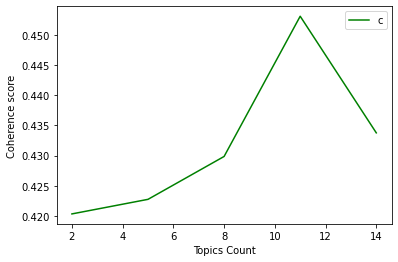

In [35]:
# Write your code here
from gensim.models import LsiModel
LSAModel = LsiModel(corpus, 20, id2word)

# defining compute for Coherence Values in LSI
def computeCoherenceValuesLSI(dictionary, doc_term_matrix, doc_clean, stop, start, step):
    coherence_values = []
    modelList = []
#providning start,stop and step
    for num_topics in range(start, stop, step):
        # generate LSA model
        LSAModel = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)
        modelList.append(LSAModel)
        coherencemodel = CoherenceModel(model=LSAModel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return modelList, coherence_values

# taking all the values from above and plotting a graph
start,stop,step=2,16,3
modelListLSA, coherenceValuesLSA = computeCoherenceValuesLSI(id2word, corpus,data_lemmatized,stop, start, step)
x = range(start, stop, step)
plt.plot(x, coherenceValuesLSA, color='green')
# giving labels to axis
plt.xlabel("Topics Count")
plt.ylabel("Coherence score")
plt.legend(("conValues"), loc='best')
plt.show()

In [36]:
# To get the topics count and the coherence values

for numberOfTopics, cv in zip(range(2, 40, 2), coherenceValuesLSA):
  print("Topics Count:", numberOfTopics, " - Coherence Value:", round(cv, 4))
pprint(LSAModel.print_topics())

Topics Count: 2  - Coherence Value: 0.4203
Topics Count: 4  - Coherence Value: 0.4227
Topics Count: 6  - Coherence Value: 0.4298
Topics Count: 8  - Coherence Value: 0.4531
Topics Count: 10  - Coherence Value: 0.4338
[(0,
  '0.400*"year" + 0.388*"today" + 0.382*"ago" + 0.369*"movement" + '
  '0.369*"shoot" + 0.367*"dead" + 0.366*"africanarch" + 0.030*"co" + '
  '0.029*"blacklivesmatt" + 0.020*"black"'),
 (1,
  '0.504*"black" + 0.442*"even" + 0.263*"peopl" + 0.231*"racism" + '
  '0.220*"flee" + 0.217*"safeti" + 0.216*"attempt" + 0.216*"reportedli" + '
  '0.216*"stick" + 0.214*"duri"'),
 (2,
  '-0.631*"co" + -0.506*"blacklivesmatt" + 0.255*"even" + -0.176*"black" + '
  '-0.162*"http" + 0.128*"flee" + 0.128*"reportedli" + 0.128*"stick" + '
  '0.128*"attempt" + 0.128*"safeti"'),
 (3,
  '-0.763*"black" + 0.333*"co" + 0.224*"blacklivesmatt" + 0.210*"even" + '
  '-0.196*"time" + -0.179*"doctor" + 0.112*"peopl" + 0.110*"racism" + '
  '0.104*"flee" + 0.102*"attempt"'),
 (4,
  '-0.505*"steal" + -

**Answer Q2:**

In this question, I used LSA to identify the number of topics. According to the results, the best number of topics is 8 since it has the highest coherence score. Topic 1 is about dead in black people, Topic 2 is about racism in black, topic 3 is about black lives matter, topic 4 is about  attempt in black, topic 5 is about crime in black, topic 6 is about gem in black, topic 7 is about places in black society, and topic 8 is about black people.

 

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [37]:
!pip install lda2vec
from platform import python_version
print(python_version())

  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14433 sha256=c2a6b78c4f827c66b47eb5fbf4c12f46c5d5dcb729b9194738cda1d4052ef9ff
  Stored in directory: /root/.cache/pip/wheels/76/51/1c/1e2960ded8d6e14b14454493fcc9c2d879a7fb99421867f177
Successfully built lda2vec
3.7.13


In [38]:
from lda2vec import preprocess 
from lda2vec import Corpus 
import spacy from spacy.lang.en import English
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

try:
    import seaborn
except:
    pass

npz = np.load(open('topics.pyldavis.npz', 'r'))
dat = {k: v for (k, v) in npz.iteritems()}
dat['vocab'] = dat['vocab'].tolist()
# dat['term_frequency'] = dat['term_frequency'] * 1.0 / dat['term_frequency'].sum() 

SyntaxError: ignored

**Answer Q3:**

The code and package backs in 2016 on python 2. Many comments changes and it doesn't work. 

Python 2 reached its end of life on January 1, 2020, and is no longer supported by the Python developer community.

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [39]:
%%capture
!pip install bertopic

In [40]:
from sklearn.datasets import fetch_20newsgroups
#docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
docs = data

In [41]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs['clean_text'])
freq = topic_model.get_topic_info(); freq.head(5)
topic_model.get_topic(0)  # Select the most frequent topic





Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

2022-04-23 21:10:29,664 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-04-23 21:11:39,060 - BERTopic - Reduced dimensionality with UMAP
2022-04-23 21:12:14,532 - BERTopic - Clustered UMAP embeddings with HDBSCAN


[('africanarch', 0.02612445319618892),
 ('fuel', 0.026104038867603544),
 ('dead', 0.025960066010281186),
 ('shot', 0.02562099457900867),
 ('zimmerman', 0.025565351111131854),
 ('blac', 0.025267480830869198),
 ('movement', 0.02512884387337837),
 ('unarm', 0.024955784299554612),
 ('georg', 0.024772085122431158),
 ('ago', 0.023868889866513338)]

In [42]:
topic_model.visualize_topics()
topic_model.visualize_distribution(probs[49], min_probability=0.015)
topic_model.visualize_hierarchy(top_n_topics=50)


In [43]:
topic_model.visualize_barchart(top_n_topics=5)
#topic_model.visualize_heatmap(n_clusters=4, width=1000, height=1000)


In [44]:
topic_model.visualize_term_rank()


In [45]:
topic_model.update_topics(docs['clean_text'], topics, n_gram_range=(1, 2))
topic_model.get_topic(0)   # We select topic that we viewed before

[('zimmerman fuel', 0.02264328672288464),
 ('unarm trayvon', 0.02264328672288464),
 ('dead georg', 0.022635467361709283),
 ('today unarm', 0.022635467361709283),
 ('africanarch year', 0.022631552452470494),
 ('movement blac', 0.022631552452470494),
 ('blac africanarch', 0.022619786752723855),
 ('fuel movement', 0.022609920084729927),
 ('shot dead', 0.022609920084729927),
 ('africanarch', 0.022598150603171246)]

**Answer Q4:**

In this question, I used BERTopic to identify the number of topics. According to the results, the best number of topics is 5 since it has the highest coherence score. Topic 1 is about black lives matter, Topic 2 is about crime in black, topic 3 is about saftey in black, topic 4 is about black people, and topic 5 is about history in black.

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.


In this exercise, we employed three methods to identify the number of the topic in text analysis. The first method was LDA, which is a simple model and fast for topic modeling. Based on the LDA, I identified 3 topics regarding their coherence scores. The second method was based on LSA in which 8 topics were identified. The last method was the BERTopic method. The results of these three methods show that the BERTopic method provides a better outcome as the topics are more understandable and distinguished. 
The BERTopic method is better than others because it keeps important words in the topic descriptions.